In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Data Management

### 1-1. Read the data set

In [172]:
# Read the train.csv data file.
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [174]:
# According to the data description, these are ordinal or categorical column.
num_to_cat_list = ['MSSubClass','OverallQual','OverallCond','MoSold']
# Transform numeric data types into string data type.
df[num_to_cat_list] = df[num_to_cat_list].astype(str)

In [175]:
# The data type should be floating point because it indicates sqft.
df['MasVnrArea'] = df['MasVnrArea'].astype(np.float)

In [176]:
# Categorical columns.
categ_df = df.select_dtypes(include=['object'])
categ_df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [177]:
# Numerical columns.
numer_df = df.select_dtypes(exclude=['object']).drop(columns='SalePrice')
numer_df.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold'],
      dtype='object')

### 1-2. Missing Values

In [178]:
# There are missing values.
df.isnull().any().sum()

19

In [179]:
#Show features with at least some NaN values
null_counts = df.isnull().sum()
null_cols = []
##print("Percentage of null values in each column:\n")
for i in range(len(null_counts)):
    if null_counts[i] != 0:
        #print(null_counts.index[i], null_counts[i]/len(df))
        null_cols.append(null_counts.index[i])

<AxesSubplot:title={'center':'Missing Value Counts'}, ylabel='Frequency'>

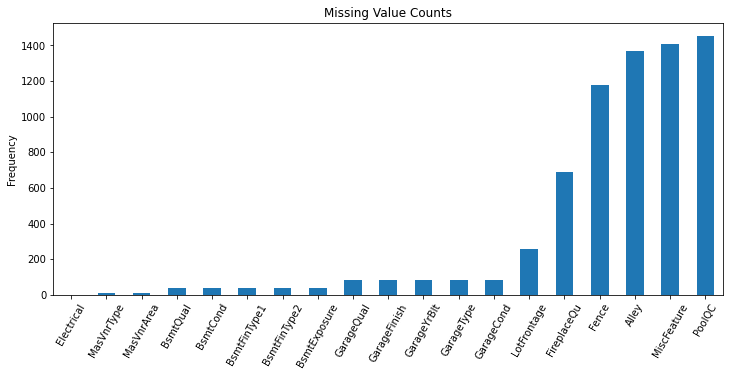

In [180]:
# Plot missing values.
# Number of "NA" in each column.
na_series = df.isnull().sum().sort_values()
na_series[na_series.values >0].plot(kind='bar',figsize=(12,5), rot=60,ylabel = 'Frequency', 
               title = 'Missing Value Counts')

In [181]:
#Columns that have the data description with an explanation for NaN values
##Basically indicates a lack of the feature is specified
valid_none_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType',
                'GarageFinish','GarageQual','FireplaceQu','GarageCond']

##Filling in with value 'None' to indicate for machine learning later
df[valid_none_cols]= df[valid_none_cols].fillna('None')
df[valid_none_cols].isna().any().sum() # No more NAs.

0

In [182]:
#Organizing the other features with NaN values into numerical and categorical features
#"Invalid" simply means the data description didn't specify NaN values

invalid_none_cols = np.array(null_cols)
#Fill with feature names in null_cols that only are NOT already in valid_none_cols
invalid_none_cols = invalid_none_cols[[i not in valid_none_cols for i in invalid_none_cols]]

#Splitting
invalid_none_categ = invalid_none_cols[[i in categ_df for i in invalid_none_cols]]
print(invalid_none_categ)

['Alley' 'MasVnrType' 'Electrical' 'PoolQC' 'Fence' 'MiscFeature']


In [183]:
invalid_none_numer = invalid_none_cols[[i in numer_df for i in invalid_none_cols]]
print(invalid_none_numer)

['LotFrontage' 'MasVnrArea' 'GarageYrBlt']


#### Comment:
- From data_description.txt file:

    PoolQC: Pool quality

           Ex	Excellent
           Gd	Good
           TA	Average/Typical
           Fa	Fair
           NA	No Pool

    Fence: Fence quality

           GdPrv	Good Privacy
           MnPrv	Minimum Privacy
           GdWo	Good Wood
           MnWw	Minimum Wood/Wire
           NA	No Fence

    MiscFeature: Miscellaneous feature not covered in other categories

           Elev	Elevator
           Gar2	2nd Garage (if not described in garage section)
           Othr	Other
           Shed	Shed (over 100 SF)
           TenC	Tennis Court
           NA	None

- When read_csv() function reads the csv file, it reads NA as NaN value(as data is missing, unregistered). However, according to the data description, 'NA' is one of feature level to describ there is no feature in the corresponding house.
- Regardless this information, it is right call to drop these columns because it has too many 'NA' levels(more than half of data) which means it will not likely affect the SalePrice anyway.

In [184]:
# Remove unnecessary features.
df = df.drop(columns=["Id", "Alley","PoolQC","Fence","MiscFeature"])

In [185]:
# According to data description file, the most columns uses 'NA' as 'No fireplace', 'No basement' and etc.
# However, MasVnrType/Electrical column contains 'NA' without any designation. Then it should be missing value.

bad_categ  = pd.concat([df['MasVnrType'],df['Electrical']],axis=1)
#Getting the particular rows in the df with NaN values
bad_rows = bad_categ[bad_categ.isna().any(axis=1)]
#Deleting these rows from the total df
df = df.drop(bad_rows.index)
#Categories without NaN descriptions should no longer have NaN values

In [186]:
# 9 rows are dropped.
df.shape

(1451, 76)

In [187]:
##IMPUTING NUMERICAL FEATURES
#For the most part these values can be assumed to indicate 0 when not filled with a number
##LotFrontage has many missing values, so all 0 wouldn't be great
#GarageYrBlt makes no sense with a value of 0. We'll change these two individually
df['LotFrontage'].loc[df['LotFrontage'].isnull()].shape # 257 NAs.

(257,)

In [188]:
#Imputing LotFrontage by assuming the fill takes on the median value
#Perhaps this can be improved with comparisons to the LotArea feature?
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['LotFrontage'].isna().sum() # 0 NAs.

0

Text(0, 0.5, 'Year Built')

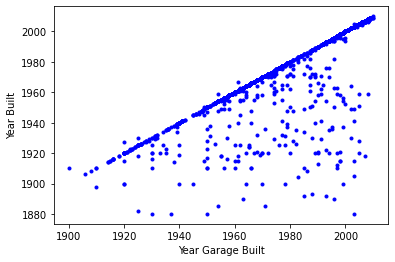

In [189]:
#Imputing GarageYrBlt based on the year the house was built
plt.plot(df["GarageYrBlt"],df["YearBuilt"],"b.")
plt.xticks(np.arange(min(df["GarageYrBlt"]),max(df["GarageYrBlt"]),20.0))
plt.xlabel("Year Garage Built")
plt.ylabel("Year Built")

In [190]:
#seems like the garage is built around the same year as the house or a bit later
#Again use the median value to fill in
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df['YearBuilt']-(df['GarageYrBlt']-df['YearBuilt']).median())

#Fill the rest of the null values to 0
for i in invalid_none_numer:
    df[i] = df[i].fillna(0)

### 1-3. The response variable (SalePrice) Transformation
- src: https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/

/Users/anchal/.pyenv/versions/3.8.6/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


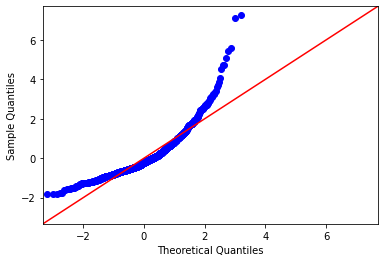

In [191]:
# See if SalePrice column is normal.
# !pip install statsmodels
import statsmodels.api as sm
from scipy.stats import boxcox

# Use Q-Q plot to see normality. It is supposed to be straight line.
fig = sm.qqplot(df['SalePrice'], fit= True, line="45")
plt.show()

#### Comment: 
- Since we are going to use linear regression models, it is necessary to transform the response variable normally distributed. Becuase the response variable is linear combination of feature variables.

/Users/anchal/.pyenv/versions/3.8.6/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


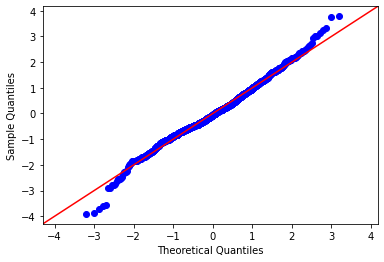

In [192]:
# Log transformation. (Better)
fig = sm.qqplot(np.log(df['SalePrice']), fit= True, line="45")
plt.show()

/Users/anchal/.pyenv/versions/3.8.6/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


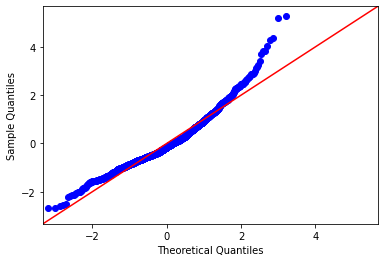

In [193]:
# Sqrt transformation. (Worse)
fig = sm.qqplot(np.sqrt(df['SalePrice']), fit= True, line="45")
plt.show()

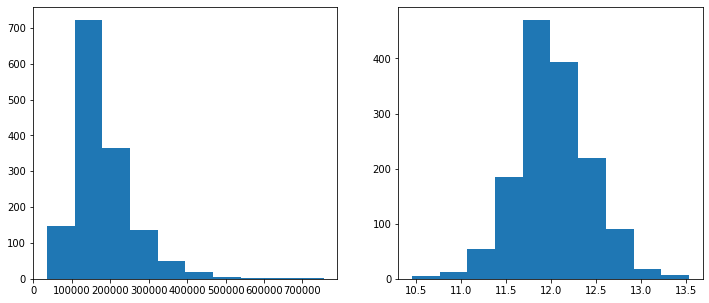

In [194]:
# Compare distribution.
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.hist(df['SalePrice'])
ax2.hist(np.log(df['SalePrice']))
plt.show()

#### Comment:
- Since log transformation normalizes the response variable, apply log transformation on SalePrice column.

In [195]:
# Apply log transformation.
df['SalePrice'] = np.log(df['SalePrice'])

### 1-4. Removing Outliers

In [196]:
# GrLivArea and GarageArea columns have relatively large correlation with the SalePrice.
# Use scatterplots to detect the outliers.
def visualDetectionOutlier(train_df):
    sp = train_df['SalePrice']
    fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(7,12))
    axes[0].scatter(x=train_df['GrLivArea'],y=sp, alpha=0.5)
    axes[0].set_title("GrLivArea vs SalePrice")
    axes[0].set_xlabel("sqft")
    axes[0].set_ylabel("Price")
    axes[1].scatter(x=train_df['GarageArea'],y=sp, alpha=0.5)
    axes[1].set_title("GarageArea vs SalePrice")
    axes[1].set_xlabel("sqft")
    axes[1].set_ylabel("Price")
    fig.tight_layout()
    plt.show()

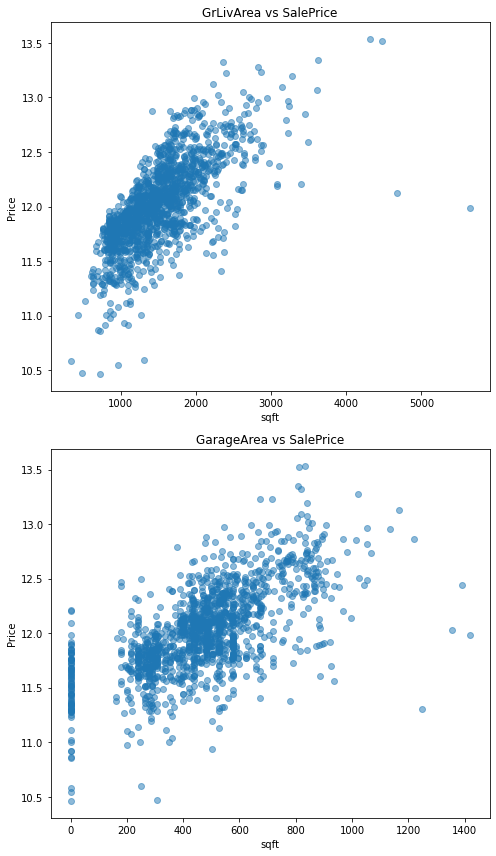

In [197]:
# Before removing outliers.
visualDetectionOutlier(df)

In [198]:
# [Plot 1: GrLivArea vs SalePrice] Bottom right two points look like outliers.
ol_plot1_bottomright = df.loc[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)]
# [Plot 2: GarageArea vs SalePrice] Bottom right four points look like outliers.
ol_plot2_bottomright = df.loc[((df['GarageArea'] > 1200) & (df['SalePrice'] < 300000))]
# [Plot 2: GarageArea vs SalePrice] Top middle two points look like outliers.
ol_plot2_topmiddle = df.loc[((df['GarageArea'] > 800) & (df['GarageArea'] < 1000)) &
                                  (df['SalePrice'] > 700000)]
# Remove the outliers.
df = df.drop(ol_plot1_bottomright.index.append(ol_plot2_bottomright.index).
                         append(ol_plot2_topmiddle.index))

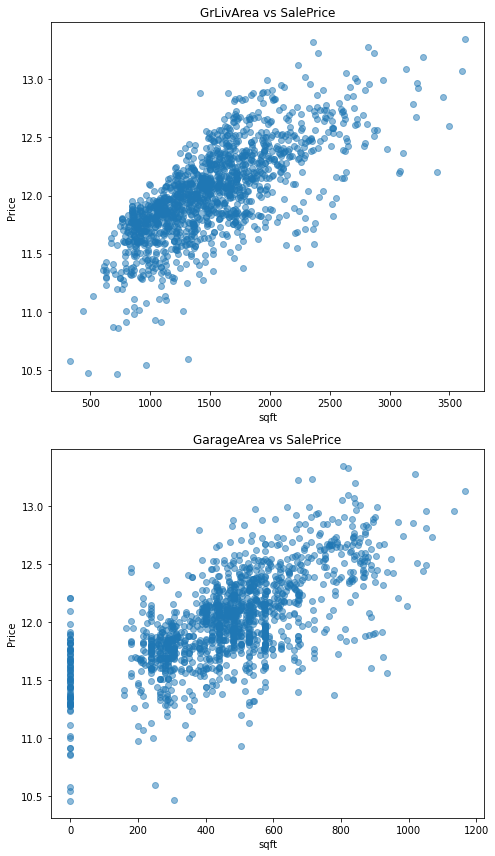

In [199]:
# Check out the linearity again.
visualDetectionOutlier(df)

### 1-5. Min-Max Scale Numerical Columns

In [200]:
# Select categorical and numerical columns from the cleaned dataframe.
categ_df = df.select_dtypes(include=['object'])
numer_df = df.select_dtypes(exclude=['object']).drop(columns='SalePrice')

In [201]:
# Transform numerical columns.
# Use MinMaxScaler.
scaler = MinMaxScaler()

# Numerical column names.
numer_col_names = numer_df.columns
numer_col_names

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'YrSold'],
      dtype='object')

In [202]:
# Transform the numerical columsn.
df[numer_col_names] = scaler.fit_transform(df[numer_col_names])
df[numer_col_names]

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
0,0.150685,0.033420,0.949275,0.883333,0.122500,0.322669,0.000000,0.064212,0.266999,0.180373,...,0.50,0.469983,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.50
1,0.202055,0.038795,0.753623,0.433333,0.000000,0.446984,0.000000,0.121575,0.393637,0.320663,...,0.50,0.394511,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.25
2,0.160959,0.046507,0.934783,0.866667,0.101250,0.222121,0.000000,0.185788,0.286962,0.202488,...,0.50,0.521441,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.50
3,0.133562,0.038561,0.311594,0.333333,0.000000,0.098720,0.000000,0.231164,0.235808,0.216655,...,0.75,0.550600,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.00
4,0.215753,0.060576,0.927536,0.833333,0.218750,0.299360,0.000000,0.209760,0.357143,0.280235,...,0.75,0.716981,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.140411,0.030929,0.920290,0.833333,0.000000,0.000000,0.000000,0.407962,0.297255,0.213891,...,0.50,0.394511,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.25
1456,0.219178,0.055505,0.768116,0.633333,0.074375,0.361060,0.110583,0.252140,0.480973,0.600898,...,0.50,0.428816,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,1.00
1457,0.154110,0.036187,0.500000,0.933333,0.000000,0.125686,0.000000,0.375428,0.359326,0.295093,...,0.25,0.216123,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,1.00
1458,0.160959,0.039342,0.565217,0.766667,0.000000,0.022395,0.698100,0.000000,0.336245,0.257084,...,0.25,0.205832,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,1.00


### 1-6. Correlation Matrix 

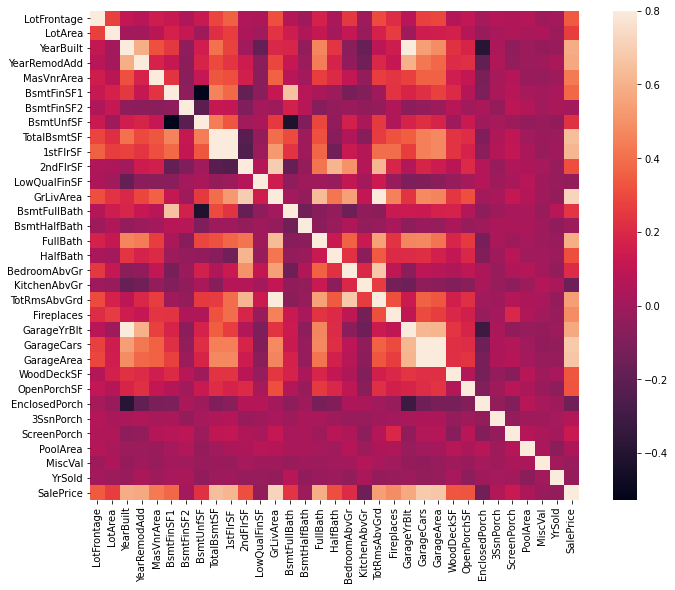

In [203]:
# Correlation matrix.
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [204]:
#Find out which parameters appear to have an appreciable linear relationship with SalePrice
#Arbitrary 0.5 correlation cutoff
print("List of parameters that have a good linear model fit to Sale Price")
corr_series = corrmat['SalePrice'].sort_values()[:-1]
corr_series[(corr_series > 0.5) | (corr_series < -0.5)]

List of parameters that have a good linear model fit to Sale Price


TotRmsAbvGrd    0.535635
YearRemodAdd    0.566891
GarageYrBlt     0.571302
YearBuilt       0.587201
FullBath        0.591328
1stFlrSF        0.613928
TotalBsmtSF     0.640654
GarageArea      0.666923
GarageCars      0.684121
GrLivArea       0.718665
Name: SalePrice, dtype: float64

In [205]:
# Correlation between SalePrice and other variables.
# Sorted from the least to the most correlated.
corrmat.loc['SalePrice'].abs().sort_values()[:-1]

BsmtFinSF2       0.007980
BsmtHalfBath     0.013811
MiscVal          0.018007
YrSold           0.033518
LowQualFinSF     0.037301
PoolArea         0.041235
3SsnPorch        0.057026
ScreenPorch      0.126086
EnclosedPorch    0.149259
KitchenAbvGr     0.150184
BedroomAbvGr     0.208011
BsmtUnfSF        0.224954
BsmtFullBath     0.235625
LotArea          0.260770
HalfBath         0.309967
2ndFlrSF         0.310751
OpenPorchSF      0.323636
WoodDeckSF       0.331922
LotFrontage      0.342499
BsmtFinSF1       0.378682
MasVnrArea       0.426611
Fireplaces       0.488206
TotRmsAbvGrd     0.535635
YearRemodAdd     0.566891
GarageYrBlt      0.571302
YearBuilt        0.587201
FullBath         0.591328
1stFlrSF         0.613928
TotalBsmtSF      0.640654
GarageArea       0.666923
GarageCars       0.684121
GrLivArea        0.718665
Name: SalePrice, dtype: float64

### 1-7. One-Hot Encoding Categorical Columns

In [206]:
# The categorical columns to be encoded.
categ_df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [207]:
#Pandas One Hot Encoding.
df = pd.get_dummies(df, columns=categ_df.columns,prefix=categ_df.columns, drop_first=True)

In [208]:
df

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.150685,0.033420,0.949275,0.883333,0.122500,0.322669,0.000000,0.064212,0.266999,0.180373,...,0,0,0,0,1,0,0,0,1,0
1,0.202055,0.038795,0.753623,0.433333,0.000000,0.446984,0.000000,0.121575,0.393637,0.320663,...,0,0,0,0,1,0,0,0,1,0
2,0.160959,0.046507,0.934783,0.866667,0.101250,0.222121,0.000000,0.185788,0.286962,0.202488,...,0,0,0,0,1,0,0,0,1,0
3,0.133562,0.038561,0.311594,0.333333,0.000000,0.098720,0.000000,0.231164,0.235808,0.216655,...,0,0,0,0,1,0,0,0,0,0
4,0.215753,0.060576,0.927536,0.833333,0.218750,0.299360,0.000000,0.209760,0.357143,0.280235,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.140411,0.030929,0.920290,0.833333,0.000000,0.000000,0.000000,0.407962,0.297255,0.213891,...,0,0,0,0,1,0,0,0,1,0
1456,0.219178,0.055505,0.768116,0.633333,0.074375,0.361060,0.110583,0.252140,0.480973,0.600898,...,0,0,0,0,1,0,0,0,1,0
1457,0.154110,0.036187,0.500000,0.933333,0.000000,0.125686,0.000000,0.375428,0.359326,0.295093,...,0,0,0,0,1,0,0,0,1,0
1458,0.160959,0.039342,0.565217,0.766667,0.000000,0.022395,0.698100,0.000000,0.336245,0.257084,...,0,0,0,0,1,0,0,0,1,0


In [209]:
df.shape

(1443, 283)

In [210]:
# Feature variables.
X = df.copy().drop(columns='SalePrice')
X

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.150685,0.033420,0.949275,0.883333,0.122500,0.322669,0.000000,0.064212,0.266999,0.180373,...,0,0,0,0,1,0,0,0,1,0
1,0.202055,0.038795,0.753623,0.433333,0.000000,0.446984,0.000000,0.121575,0.393637,0.320663,...,0,0,0,0,1,0,0,0,1,0
2,0.160959,0.046507,0.934783,0.866667,0.101250,0.222121,0.000000,0.185788,0.286962,0.202488,...,0,0,0,0,1,0,0,0,1,0
3,0.133562,0.038561,0.311594,0.333333,0.000000,0.098720,0.000000,0.231164,0.235808,0.216655,...,0,0,0,0,1,0,0,0,0,0
4,0.215753,0.060576,0.927536,0.833333,0.218750,0.299360,0.000000,0.209760,0.357143,0.280235,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.140411,0.030929,0.920290,0.833333,0.000000,0.000000,0.000000,0.407962,0.297255,0.213891,...,0,0,0,0,1,0,0,0,1,0
1456,0.219178,0.055505,0.768116,0.633333,0.074375,0.361060,0.110583,0.252140,0.480973,0.600898,...,0,0,0,0,1,0,0,0,1,0
1457,0.154110,0.036187,0.500000,0.933333,0.000000,0.125686,0.000000,0.375428,0.359326,0.295093,...,0,0,0,0,1,0,0,0,1,0
1458,0.160959,0.039342,0.565217,0.766667,0.000000,0.022395,0.698100,0.000000,0.336245,0.257084,...,0,0,0,0,1,0,0,0,1,0


In [211]:
# Response variable.
y = df['SalePrice'].copy()
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1443, dtype: float64

# 2. Machine Learning and Algorithms

### 2-1. Feature Selection
As visualized above, there are 282 features left after extensive data preprocessing and cleaning. In order to identify the best set of features that would enable our model to accurately predict the ```SalePrice```, we need to perform the feature selection process. From [Scikit-Learn](https://scikit-learn.org/stable/modules/feature_selection.html), we attempted three separate methods:

1. VarianceThreshold 
2. SelectFromModel using Lasso Regression
3. RFE

After comparing each method's impact on the R^2 scores and MSE values for the ML regression methods below, we came to the conclusion that the dataframe (df) should be left as is, without any feature selection. A visual of this is in ```feature_selection_attempt.ipynb``` with the VarianceThreshold() method, where the R^2 values dropped significantly after the removal of some features.

### 2-2. Split the Dataset 

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21, test_size = 0.2)

In [213]:
X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
90,0.133562,0.027577,0.565217,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.243953,...,0,0,0,0,1,0,0,0,1,0
84,0.164384,0.033794,0.891304,0.766667,0.013750,0.000000,0.0,0.164384,0.119775,0.162405,...,0,0,0,0,1,0,0,0,1,0
506,0.202055,0.038580,0.876812,0.733333,0.078125,0.173675,0.0,0.169949,0.242358,0.252592,...,0,0,0,0,1,0,0,0,1,0
516,0.164384,0.042759,0.724638,0.366667,0.208125,0.000000,0.0,0.294949,0.214910,0.360746,...,0,0,0,0,0,0,0,0,0,0
1195,0.102740,0.031452,0.963768,0.916667,0.000000,0.000000,0.0,0.311644,0.227074,0.136144,...,0,0,0,0,1,0,0,0,1,0


In [214]:
y_train.head()

90      11.607326
84      12.034691
506     12.278393
516     11.970350
1195    12.078239
Name: SalePrice, dtype: float64

### 2-3. Regression Methods

Each regression method has been researched and chosen for its capabilities in supervised learning, especially regression. In order to avoid using biased models, 10-fold cross validation has been used to generalize each model based on the given data set. Specifically, the R^2 score and MSE has been obtained for each iteration of the cross validation, as well as the average of both metrics.

#### 2-3-1. Ridge Regression
This model solves a regression model where the loss function is the linear least squares function and regularization is given by the L2-norm.

In [58]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha = 0.5)
# ridgeReg.fit(X_train, y_train)
# print('Ridge')
# print(ridgeReg.score(X_test, y_test)) # returns R^2 score

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import *

cv = KFold(n_splits=10, random_state=21, shuffle=True)

r2_ridge = cross_val_score(ridgeReg, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_ridge = cross_val_score(ridgeReg, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_ridge)
print("\n")
print("Mean R^2 Score:", mean(r2_ridge))
print("\n")
print("MSE:", abs(mse_ridge))
print("\n")
print("Mean MSE Value:", abs(mean(mse_ridge)))

R^2 Score: [0.9045374  0.90947963 0.90733268 0.90660318 0.92476194 0.90197687
 0.91748125 0.91208179 0.87138431 0.92115005]


Mean R^2 Score: 0.907678909509426


MSE: [0.01269437 0.0127063  0.01380695 0.01387421 0.01336772 0.01462665
 0.01357315 0.01402238 0.02127065 0.01327278]


Mean MSE Value: 0.014321515224918329


#### 2-3-2. Lasso Regression

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the L1-norm.

In [62]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha = 0.5)
# lassoReg.fit(X_train, y_train)
# print('Lasso')
# print(lassoReg.score(X_test, y_test)) # returns R^2 score

In [63]:
r2_lasso = cross_val_score(lassoReg, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_lasso = cross_val_score(lassoReg, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_lasso)
print("\n")
print("Mean R^2 Score:", mean(r2_lasso))
print("\n")
print("MSE:", abs(mse_lasso))
print("\n")
print("Mean MSE Value:", abs(mean(mse_lasso)))

R^2 Score: [-1.28050776e-02 -1.07636039e-05 -6.14948583e-05 -1.26188294e-06
 -5.83888152e-03 -8.92347894e-05 -1.10165790e-02 -2.42146147e-02
 -3.38708753e-03 -4.16809986e-04]


Mean R^2 Score: -0.005784180554372997


MSE: [0.13468025 0.14037102 0.14900402 0.14855134 0.17870968 0.14922959
 0.16629767 0.16335552 0.16594159 0.16839979]


Mean MSE Value: 0.15645404747634253


#### 2-3-3. XGBoost Regression
This model is an implementation of the gradient boosting trees algorithm for regression-based data.

In [66]:
# !pip install xgboost
from xgboost import XGBRegressor

XGB = XGBRegressor()
# XGB.fit(X_train, y_train)
# print(XGB.score(X_test, y_test))

In [67]:
r2_XGB = cross_val_score(XGB, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_XGB = cross_val_score(XGB, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_XGB)
print("\n")
print("Mean R^2 Score:", mean(r2_XGB))
print("\n")
print("MSE:", abs(mse_XGB))
print("\n")
print("Mean MSE Value:", abs(mean(mse_XGB)))

R^2 Score: [0.88960256 0.88394194 0.90441116 0.82485929 0.86350502 0.86636087
 0.87228698 0.89076524 0.84049658 0.9196396 ]


Mean R^2 Score: 0.8755869237313608


MSE: [0.01468037 0.01629101 0.01424225 0.02601735 0.02425137 0.01994113
 0.02100695 0.01742223 0.0263789  0.01352704]


Mean MSE Value: 0.01937586130316315


#### 2-3-4. KNN Regression
This model performs regression based on k-nearest neighbors, where the target variable is predicted by local interpolation of the nearest neighbors in the training set.

In [70]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor()
# KNN.fit(X_train,y_train)
# print(KNN.score(X_test, y_test))

In [71]:
r2_KNN = cross_val_score(KNN, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_KNN = cross_val_score(KNN, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_KNN)
print("\n")
print("Mean R^2 Score:", mean(r2_KNN))
print("\n")
print("MSE:", abs(mse_KNN))
print("\n")
print("Mean MSE Value:", abs(mean(mse_KNN)))

R^2 Score: [0.75661841 0.71840843 0.80678445 0.73710456 0.7700033  0.78805909
 0.81761206 0.80627057 0.74481492 0.8029812 ]


Mean R^2 Score: 0.7748656989532424


MSE: [0.03236427 0.03952687 0.02878812 0.03905342 0.04086404 0.03162503
 0.03000019 0.03089857 0.04220287 0.0331641 ]


Mean MSE Value: 0.03484874906043082


#### 2-3-5. Linear Regression
This model perfoms ordinary least squares linear regression by minimizing the residual sum of squares between the observed targets (predicted by linear approximation) in the dataset. 

In [74]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
# LR.fit(X_train, y_train)
# LR.score(X_train, y_train)

In [75]:
r2_LR = cross_val_score(LR, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_LR = cross_val_score(LR, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_LR)
print("\n")
print("Mean R^2 Score:", mean(r2_LR))
print("\n")
print("MSE:", abs(mse_LR))
print("\n")
print("Mean MSE Value:", abs(mean(mse_LR)))

R^2 Score: [-4.88947872e+20 -1.65205701e+19 -1.58724658e+14 -7.38153990e+00
 -7.57828997e+13 -1.82623934e+19 -1.04197542e+18 -3.47462736e+18
 -2.39126124e+19 -2.87513954e+18]


Mean R^2 Score: -5.550354252642588e+19


MSE: [6.50190465e+19 2.31898434e+18 2.36491586e+13 1.24508743e+00
 1.34645204e+13 2.72504631e+18 1.71389955e+17 5.54180288e+17
 3.95470197e+18 4.83971160e+17]


Mean MSE Value: 7.522735768897755e+18


#### 2-3-6. Random Forest Regression
This model uses a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset, and uses averaging to improve the predictive accuracy and control over-fitting.

In [78]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
# rfr.fit(X_train, y_train)
# print(rfr.score(X_test, y_test))

In [79]:
r2_rfr = cross_val_score(rfr, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_rfr = cross_val_score(rfr, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_rfr)
print("\n")
print("Mean R^2 Score:", mean(r2_rfr))
print("\n")
print("MSE:", abs(mse_rfr))
print("\n")
print("Mean MSE Value:", abs(mean(mse_rfr)))

R^2 Score: [0.87190807 0.86742688 0.90393713 0.85304652 0.84701536 0.86226288
 0.86794501 0.88292346 0.84681686 0.89440723]


Mean R^2 Score: 0.8697689399002149


MSE: [0.01631393 0.01795653 0.01382005 0.02143495 0.0265396  0.01990174
 0.02100866 0.01912485 0.02540972 0.01741626]


Mean MSE Value: 0.019892628507400985


#### 2-3-7. Support Vector Regression
This model identifies the data points within the epsilon-defined error decision boundary to produce a line of best fit for predicting discrete values. For our dataset, the linear kernel was the best fit.

In [168]:
from sklearn.svm import SVR
# from sklearn.metrics import r2_score

svr = SVR(kernel='linear')
# svr.fit(X_train, np.asarray(y_train))
# y_pred_svr = svr.predict(X_test)
# r2_score(y_test, y_pred_svr)

In [169]:
r2_svr = cross_val_score(svr, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_svr = cross_val_score(svr, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_svr)
print("\n")
print("Mean R^2 Score:", mean(r2_svr))
print("\n")
print("MSE:", abs(mse_svr))
print("\n")
print("Mean MSE Value:", abs(mean(mse_svr)))

R^2 Score: [0.89499305 0.88335153 0.90063252 0.89422505 0.9186517  0.88253
 0.90820499 0.90601667 0.85123047 0.91937944]


Mean R^2 Score: 0.8959215438729572


MSE: [0.01396356 0.01637389 0.01480524 0.01571299 0.01445334 0.01752844
 0.01509896 0.01498972 0.02460372 0.01357083]


Mean MSE Value: 0.016110068009762415


#### 2-3-8. Neural Network

In [236]:
# !pip install keras
# !pip install tensorflow
import keras
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU

In [237]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(X, y,test_size = 0.2, random_state = 21)
X_val, X_test, Y_val, Y_test = train_test_split(x_test_nn, y_test_nn, test_size=0.5)

In [238]:
# creating model
model = keras.Sequential()

# I will be testing out activation rectifided linear units
# first layer (input layer)
model.add(keras.layers.Dense(60, activation='relu', input_shape=(282,)))
# second layer
# now using sigmoid as activation 
model.add(keras.layers.Dense(60, activation='sigmoid'))
# third layer
# output layer should still only be one (sale price)
model.add(keras.layers.Dense(1))

# using mean squared error for metric because it is regression problem
model.compile(optimizer='adam', loss= 'mean_squared_error', metrics = ['mean_squared_error'])

In [239]:
# train the model

# testing different number of epochs
hist=model.fit(x_train_nn,y_train_nn, epochs=150, validation_data=(X_val, Y_val))

Epoch 1/150
37/37 [==============================] - 10s 11ms/step - loss: 120.4032 - mean_squared_error: 120.4032 - val_loss: 54.5969 - val_mean_squared_error: 54.5969
Epoch 2/150
37/37 [==============================] - 0s 1ms/step - loss: 44.8071 - mean_squared_error: 44.8071 - val_loss: 27.9365 - val_mean_squared_error: 27.9365
Epoch 3/150
37/37 [==============================] - 0s 2ms/step - loss: 24.5577 - mean_squared_error: 24.5577 - val_loss: 16.7829 - val_mean_squared_error: 16.7829
Epoch 4/150
37/37 [==============================] - 0s 2ms/step - loss: 14.7865 - mean_squared_error: 14.7865 - val_loss: 9.7917 - val_mean_squared_error: 9.7917
Epoch 5/150
37/37 [==============================] - 0s 2ms/step - loss: 8.4708 - mean_squared_error: 8.4708 - val_loss: 5.4790 - val_mean_squared_error: 5.4790
Epoch 6/150
37/37 [==============================] - 0s 1ms/step - loss: 4.7489 - mean_squared_error: 4.7489 - val_loss: 2.9443 - val_mean_squared_error: 2.9443
Epoch 7/150
37/3

37/37 [==============================] - 0s 1ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 52/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0214 - val_mean_squared_error: 0.0214
Epoch 53/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 54/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 55/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 56/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 57/150
37/37 [=====================

37/37 [==============================] - 0s 1ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 102/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 103/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 104/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 105/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 106/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 107/150
37/37 [===============

In [240]:
#evaluating the model
model.evaluate(x_test_nn, y_test_nn)[1]

10/10 [==============================] - 0s 2ms/step - loss: 0.0190 - mean_squared_error: 0.0190


0.019019585102796555

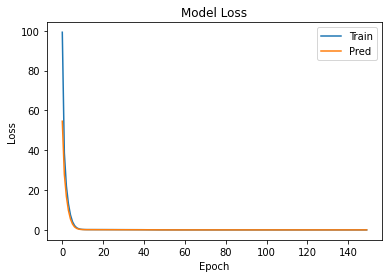

In [241]:
# plotting to look for overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Pred'], loc = 'upper right')
plt.show()

### 2-4. Finding Optimal Hyperparameters

We will use GridSearch() to populate optimal hyperparameters for the above regression methods. In this section and the following section, we will exclude lasso regression and linear regression, as their R^2 scores were negative and indicate a worse fit than the mean line. Additionally, we will exclude the neural network because optimization has already been attempted through trial-and-error of the number of hidden layers, neurons, activations, and epochs.

#### 2-4-1. Ridge Regression

In [132]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

alpha = [0.05, 0.1, 0.5, 1, 2, 3, 4, 4.5, 5]
tol = [0.0001, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
parameter_space = {
    'alpha' : alpha,
    'tol'   : tol,
}

In [133]:
from sklearn.model_selection import GridSearchCV

def grid_search(clf, parameters, X, y): # using the GridSearch method to parse through every combination of hyperparameters specified in the above code block
    gridSearch = GridSearchCV(clf, param_grid=parameters, n_jobs=-1, cv=5) 
    gridSearch.fit(X,y)
    params = gridSearch.best_params_
    score = gridSearch.best_score_
    return gridSearch, params, score

clf, params, score = grid_search(ridgeReg, parameter_space, X, y)

print('Best parameters found :\n', params)
print('Best score :\n', score)

Best parameters found :
 {'alpha': 4, 'tol': 0.0001}
Best score :
 0.9078921916223945


After performing GridSearch, there is a minimal increase in scores.

#### 2-4-2. XGBoost Regression

In [146]:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html

learning_rate = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
n_estimators = [1000, 2000, 500]
max_depth = [5, 6, 7, 8, 9, 10]

parameter_space = {
    'learning_rate' : learning_rate,
    'n_estimators': n_estimators,
    'max_depth' : max_depth
}

In [147]:
from sklearn.model_selection import GridSearchCV

def grid_search(clf, parameters, X, y): # using the GridSearch method to parse through every combination of hyperparameters specified in the above code block
    gridSearch = GridSearchCV(clf, param_grid=parameters, n_jobs=-1, cv=5) 
    gridSearch.fit(X,y)
    params = gridSearch.best_params_
    score = gridSearch.best_score_
    return gridSearch, params, score

clf, params, score = grid_search(XGB, parameter_space, X, y)

print('Best parameters found :\n', params)
print('Best score :\n', score)

Best parameters found :
 {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 2000}
Best score :
 0.9001718196686823


After performing GridSearch, there is a decent increase in scores.

#### 2-4-3. KNN Regression

In [160]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
leaf_size = [2, 5, 7, 10, 20, 30]

parameter_space = {
    'n_neighbors' : n_neighbors,
    'leaf_size': leaf_size
}

In [161]:
from sklearn.model_selection import GridSearchCV

def grid_search(clf, parameters, X, y): # using the GridSearch method to parse through every combination of hyperparameters specified in the above code block
    gridSearch = GridSearchCV(clf, param_grid=parameters, n_jobs=-1, cv=5) 
    gridSearch.fit(X,y)
    params = gridSearch.best_params_
    score = gridSearch.best_score_
    return gridSearch, params, score

clf, params, score = grid_search(KNN, parameter_space, X, y)

print('Best parameters found :\n', params)
print('Best score :\n', score)

Best parameters found :
 {'leaf_size': 2, 'n_neighbors': 6}
Best score :
 0.7774910657469281


After performing GridSearch, there is a minimal increase in scores.

#### 2-4-4. Random Forest Regression

In [162]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

min_samples_leaf = [1, 2, 3, 4, 5]
n_estimators = [1000, 2000, 500]
# max_depth = [5, 6, 7, 8, 9, 10]

parameter_space = {
    'min_samples_leaf' : min_samples_leaf,
    'n_estimators': n_estimators
    #'max_depth' : max_depth
}

In [163]:
from sklearn.model_selection import GridSearchCV

def grid_search(clf, parameters, X, y): # using the GridSearch method to parse through every combination of hyperparameters specified in the above code block
    gridSearch = GridSearchCV(clf, param_grid=parameters, n_jobs=-1, cv=5) 
    gridSearch.fit(X,y)
    params = gridSearch.best_params_
    score = gridSearch.best_score_
    return gridSearch, params, score

clf, params, score = grid_search(rfr, parameter_space, X, y)

print('Best parameters found :\n', params)
print('Best score :\n', score)

Best parameters found :
 {'min_samples_leaf': 2, 'n_estimators': 2000}
Best score :
 0.8709166856822117


After performing GridSearch, there is a minimal increase in scores.

#### 2-4-5. Support Vector Regression

In [142]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

C = [0.001, 0.005, 0.05, 0.01, 0.1, 0.5, 1.0, 10.0]
epsilon = [0.001, 0.005, 0.05, 0.01, 0.1, 0.5, 1.0, 10.0]

parameter_space = {
    'C' : C,
    'epsilon': epsilon
}

In [143]:
from sklearn.model_selection import GridSearchCV

def grid_search(clf, parameters, X, y): # using the GridSearch method to parse through every combination of hyperparameters specified in the above code block
    gridSearch = GridSearchCV(clf, param_grid=parameters, n_jobs=-1, cv=5) 
    gridSearch.fit(X,y)
    params = gridSearch.best_params_
    score = gridSearch.best_score_
    return gridSearch, params, score

clf, params, score = grid_search(svr, parameter_space, X, y)

print('Best parameters found :\n', params)
print('Best score :\n', score)

Best parameters found :
 {'C': 0.05, 'epsilon': 0.005}
Best score :
 0.9108466864271645


After performing GridSearch, there is a decent increase in scores.

### 2-5. Implementation of Optimal Hyperparameters
Now, we will implement the obtained hyperparameters in our initial regression methods. Once again, we will be exclusing lasso regression, linear regression and the neural network.

#### 2-5-1. Ridge Regression

In [218]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha = 4, tol = 0.0001)
# ridgeReg.fit(X_train, y_train)
# print('Ridge')
# print(ridgeReg.score(X_test, y_test)) # returns R^2 score

In [219]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import *

cv = KFold(n_splits=10, random_state=21, shuffle=True)

r2_ridge = cross_val_score(ridgeReg, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_ridge = cross_val_score(ridgeReg, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_ridge)
print("\n")
print("Mean R^2 Score:", mean(r2_ridge))
print("\n")
print("MSE:", abs(mse_ridge))
print("\n")
print("Mean MSE Value:", abs(mean(mse_ridge)))

R^2 Score: [0.90927386 0.91440939 0.91916357 0.90238206 0.92152776 0.89973272
 0.91990351 0.91569001 0.86608201 0.94017923]


Mean R^2 Score: 0.9108344112750121


MSE: [0.01206453 0.01201431 0.01204421 0.01450126 0.01394234 0.01496151
 0.01317472 0.01344689 0.02214755 0.01006961]


Mean MSE Value: 0.013836693343777774


#### 2-5-2. XGBoost Regression

In [221]:
# !pip install xgboost
from xgboost import XGBRegressor

XGB = XGBRegressor(learning_rate = 0.05, max_depth = 5, n_estimators = 2000)
# XGB.fit(X_train, y_train)
# print(XGB.score(X_test, y_test))

In [222]:
r2_XGB = cross_val_score(XGB, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_XGB = cross_val_score(XGB, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_XGB)
print("\n")
print("Mean R^2 Score:", mean(r2_XGB))
print("\n")
print("MSE:", abs(mse_XGB))
print("\n")
print("Mean MSE Value:", abs(mean(mse_XGB)))

R^2 Score: [0.90388057 0.90224003 0.91531602 0.87728297 0.90145737 0.88928738
 0.89605733 0.9204788  0.87026489 0.93944121]


Mean R^2 Score: 0.9015706563418072


MSE: [0.01278172 0.01372252 0.01261748 0.01822976 0.01750829 0.01652013
 0.01709707 0.01268311 0.02145578 0.01019384]


Mean MSE Value: 0.015280968941103323


#### 2-5-3. KNN Regression

In [223]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(leaf_size = 2, n_neighbors = 6)
# KNN.fit(X_train,y_train)
# print(KNN.score(X_test, y_test))

In [224]:
r2_KNN = cross_val_score(KNN, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_KNN = cross_val_score(KNN, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_KNN)
print("\n")
print("Mean R^2 Score:", mean(r2_KNN))
print("\n")
print("MSE:", abs(mse_KNN))
print("\n")
print("Mean MSE Value:", abs(mean(mse_KNN)))

R^2 Score: [0.7644344  0.73420709 0.81443425 0.7322952  0.77435279 0.79189123
 0.81524162 0.79716319 0.75562647 0.82040624]


Mean R^2 Score: 0.780005248889875


MSE: [0.03132491 0.03730922 0.02764834 0.03976786 0.04009125 0.03105321
 0.03039009 0.03235114 0.04041484 0.03023095]


Mean MSE Value: 0.03405818328993641


#### 2-5-4. Random Forest Regression

In [225]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(min_samples_leaf = 2, n_estimators = 2000)
# rfr.fit(X_train, y_train)
# print(rfr.score(X_test, y_test))

In [226]:
r2_rfr = cross_val_score(rfr, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_rfr = cross_val_score(rfr, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_rfr)
print("\n")
print("Mean R^2 Score:", mean(r2_rfr))
print("\n")
print("MSE:", abs(mse_rfr))
print("\n")
print("Mean MSE Value:", abs(mean(mse_rfr)))

R^2 Score: [0.87784948 0.87655306 0.90727472 0.8530759  0.85036358 0.86082581
 0.86820875 0.88794929 0.84826228 0.89634127]


Mean R^2 Score: 0.8726704143296444


MSE: [0.01599684 0.01750863 0.01384874 0.02196951 0.02617655 0.02075455
 0.02152832 0.01780107 0.02503136 0.01759917]


Mean MSE Value: 0.019821473835094878


#### 2-5-5. Support Vector Regression

In [227]:
from sklearn.svm import SVR
# from sklearn.metrics import r2_score

svr = SVR(kernel='linear', C = 0.05, epsilon = 0.005)
# svr.fit(X_train, np.asarray(y_train))
# y_pred_svr = svr.predict(X_test)
# r2_score(y_test, y_pred_svr)

In [228]:
r2_svr = cross_val_score(svr, X, y, scoring='r2', cv=cv, n_jobs=-1)
mse_svr = cross_val_score(svr, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("R^2 Score:", r2_svr)
print("\n")
print("Mean R^2 Score:", mean(r2_svr))
print("\n")
print("MSE:", abs(mse_svr))
print("\n")
print("Mean MSE Value:", abs(mean(mse_svr)))

R^2 Score: [0.91052537 0.90999688 0.92367029 0.89243265 0.92828067 0.89291324
 0.91667332 0.91807076 0.87003741 0.93978446]


Mean R^2 Score: 0.9102385055200841


MSE: [0.01189811 0.01263369 0.01137274 0.01597925 0.01274254 0.01597909
 0.01370604 0.01306718 0.0214934  0.01013606]


Mean MSE Value: 0.013900808872506202


## 3. Results
Below are the R^2 scores and MSE values for each regression method after implementing the optimal hyperparameters. As we can see, ridge regression had the best results, followed by support vector regression.

In [244]:
# !pip install prettytable
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["ML Algorithm", "Avg R^2 Score", "Avg MSE"]) 

# Add rows 
myTable.add_row(["Ridge", mean(r2_ridge), abs(mean(mse_ridge))]) 
myTable.add_row(["SVR", mean(r2_svr), abs(mean(mse_svr))]) 
myTable.add_row(["XGBoost", mean(r2_XGB), abs(mean(mse_XGB))])
myTable.add_row(["Neural Network", "-", 0.019019585102796555])
myTable.add_row(["Random Forest", mean(r2_rfr), abs(mean(mse_rfr))]) 
myTable.add_row(["KNN", mean(r2_KNN), abs(mean(mse_KNN))]) 
  
print(myTable)

+----------------+--------------------+----------------------+
|  ML Algorithm  |   Avg R^2 Score    |       Avg MSE        |
+----------------+--------------------+----------------------+
|     Ridge      | 0.9108344112750121 | 0.013836693343777774 |
|      SVR       | 0.9102385055200841 | 0.013900808872506202 |
|    XGBoost     | 0.9015706563418072 | 0.015280968941103323 |
| Neural Network |         -          | 0.019019585102796555 |
| Random Forest  | 0.8726704143296444 | 0.019821473835094878 |
|      KNN       | 0.780005248889875  | 0.03405818328993641  |
+----------------+--------------------+----------------------+
